### Import the Libraries

In [1]:
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot
import mglearn

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

### Define the dataset

In [2]:
N = 150
X = np.linspace(0.0, 10.0, N).reshape(-1, 1)
y = np.cos(2 * np.pi * X).reshape(-1, 1)

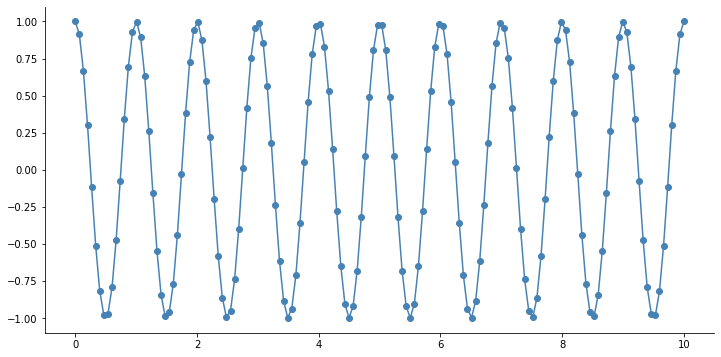

In [3]:
fig, axs = plt.subplots(figsize=(12, 6))

for s in ['top', 'right']:
    axs.spines[s].set_visible(False)

plt.plot(X, y, marker='o', color='steelblue')
plt.show()

### Split the Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=0)

### *Test for optimal hyperparameter ```n_neighbor```*

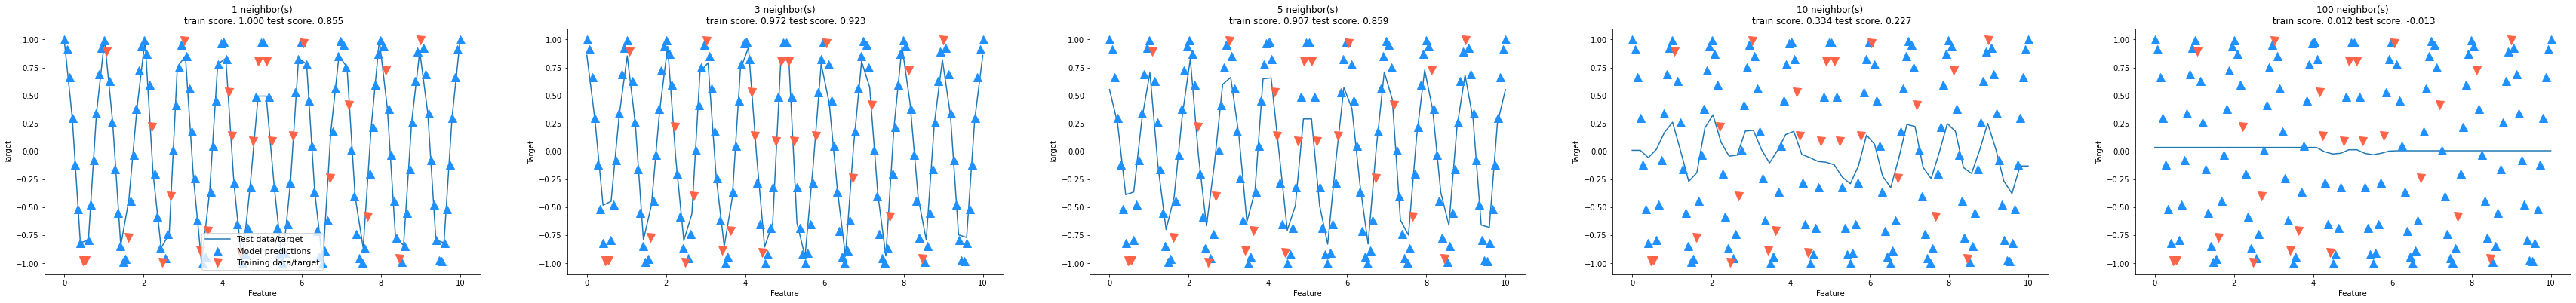

In [5]:
plt.rcParams.update({'legend.fontsize': 11, 'legend.handlelength': 3})

fig, axes = plt.subplots(1, 5, figsize=(60, 6))
line = np.linspace(0, 10, 50).reshape(50, -1)

# storing the neighbors in a list for testing
neighbors = [1, 3, 5, 10, 100]

for n_neighbors, ax in zip(neighbors, axes): # make predictions using n_neighbors of 1, 3, 5, 10, 100
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=11, color='dodgerblue')
    ax.plot(X_test, y_test, 'v', markersize=11, color='tomato')
    
    
    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)
        
    ax.set_title(
        "{} neighbor(s)\n train score: {:.3f} test score: {:.3f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
    
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

*I tested several n_neighbors for this dataset, such as k=1, k=3, k5, k=10, and k=100. Each of these parameters has a corresponding accuracy in which we will use to choose the optimal ```k```.*

#### *k=1*
<div style="text-align: justify" ><i>The k=1 parameter gave the best results in the training score, an $R^2$ of 1, a perfect score. Although, the model made some mistakes in the test $R^2$ = 0.855, not bad in my opintion, but the disparity or the difference between the two scores is unsightful, the model was able to predict all the train set but not the test set, the model was not able to generalize the patterns, hence, it made some mistakes. Moreover, this is also an issue of <b>overfitting</b>, the model was able to perfect the train set but not the test set. This is also called, deductive reasoning, the model was given a dataset with specific and limited in scope but it was not able to proceed to a generalized conclusion. Finally, and $R^2$ of 0.855 is not bad but, we can  still explore other n_neighbors which can perform better.</i></div> 

#### *k=3*
<div style="text-align: justify" ><i>The k=3 parameter gave an amazing results in both train and test scores. We have and $R^2$ of 0.972 in training and 0.923 in testing. As we can see in the above chart, this parameter made some mistakes in the training and there were some data that the model wasn't able to predict correctly, however, we improved the performance in our testing, from and $R^2$ of 0.885 where <code>k=1</code> in testing to 0.923 where <code>k=3</code>. The model may have higher score in training than testing, but both of these score are high and we significantly improved the testing accuracy of our model, and considering the dispanity between the two scores, it is still an improvement from the <code>k=1</code>. <b>The model was able to do inductive reasoning from specific data to a more generalized conclusion to use for future prediction</b>, we can also assume that this model will perform better in the future compared to <code>k=1</code>.</i></div>

#### *k=5*
<div style="text-align: justify" ><i>The k=5 parameter also gave some good results in training and testing, however, the disparity between two scores, the <code>k=3</code> model is still better. This model was able to perform well in the training set, but not so much in the test set; as you can see from the chart above, the prediction line was not able to cross some of the testing data, hence, the testing score decreased. Moreover, an issue of overfitting exist in this model, while the model was able to give high $R^2$ in training, but the testing score decreased, <b>while the test $R^2$ of 0.859 is not generally bad but when compared to train, the disparity between the two should not be neglected</b>.</i></div>

#### *k=10*
<div style="text-align: justify" ><i>Even though that there is no rule of thumb of a good $R^2$ and a bad one, but the results of this model is so low <b>compared</b> to other pass n_neighbors. With a train score of 0.334 and a test score of 0.227, the model poorly predicted in both categories, by the results alone, we can also say that this model is <b>underfit since the model poorly performed in both categories resulting to high bias and low variance</b>, considering the dataset. We can also see the prediction line above that the model failed cross or atleast get near to the majority of both train and test set compared to the prediction line of <code>k=1</code> and  <code>k=3</code>.</i></div>

#### *k=100*
<div style="text-align: justify" ><i>Compared to other 4 n_neighbors, this one is the worst to use as a parameter for this model. With a train $R^2$ of 0.012 and a test $R^2$ of -0.013, this model is <b>extremely underfit</b>. We can also call this model a trash model since it has a relativly low $R^2$, even when compared to other 4 n_neighbors. Moreover, the prediction line doesnt make any sense, it just draws a straight line and doesnt come close to the prediction line of other models, and the $R^2$ of the test is so low that it became negative, $R^2$ is <a href="https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative">negative only when the chosen model (in this case k=100) does not follow the trend of the data.</a></i></div>

### *Test for optimal hyperparameter ```n_neighbor``` with 150 trials per neighbor*

In [6]:
final_training_accuracy = {}
final_test_accuracy = {}

final_train_std = {}
final_test_std = {}

neighbors = [1, 3, 5, 10, 100]
trials = range(0, 150)

def std(vals: list) -> float:
    to_list = list(vals)
    return sum((np.mean(to_list) - i)**2 for i in to_list)/len(to_list)

for k in neighbors:
    trial_training_accuracy = []
    trial_test_accuracy = []

    clf = KNeighborsRegressor(n_neighbors=k)
    for _ in trials:
        xtrain, xtext, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=None)
        clf.fit(xtrain, ytrain)
        
        r2_train = clf.score(xtrain, ytrain)
        r2_test = clf.score(xtext, ytest)
        
        trial_training_accuracy.append(r2_train)
        trial_test_accuracy.append(r2_test)
        
    
    final_train_std[k] = std(trial_training_accuracy)
    final_test_std[k] = std(trial_test_accuracy)
    
    final_training_accuracy[k] = np.mean(trial_training_accuracy)
    final_test_accuracy[k] = np.mean(trial_test_accuracy)

In [7]:
final_training_accuracy

{1: 1.0,
 3: 0.9467528324486242,
 5: 0.8501108870243465,
 10: 0.20649219365232913,
 100: 0.0005305147776509581}

In [8]:
final_test_accuracy

{1: 0.7904021044213558,
 3: 0.8208135013274999,
 5: 0.644724330240789,
 10: -0.1452201447827406,
 100: -0.04693609005168585}

In [9]:
for train, test, k in zip(final_training_accuracy.values(), 
                          final_test_accuracy.values(), 
                          [1, 3, 5, 10, 100]):
    print(f"K={k}, Difference:{abs(train - test)}")

K=1, Difference:0.20959789557864417
K=3, Difference:0.12593933112112432
K=5, Difference:0.20538655678355744
K=10, Difference:0.3517123384350697
K=100, Difference:0.04746660482933681


<div style="text-align: justify" ><i>I calculated the $R^2$ of each n_neighbor but using <code>150 trials</code>, and in each trial the <code>random_state=None</code> which means that in every call, it returns different set of train and test. Surprisingly, the <code>k=1</code> gives a perfect $R^2$ for train set, even if the number of trials is set to 150. However, when we look at the test $R^2$  and the difference between train and test scores is enormous, among the five <code>n_neighbors</code>.</i></div>
<br>
<div style="text-align: justify" ><i>Moreover, when we look at <code>k=3</code> we can see an undeniably high disparity between the rain and test scores, but when we compare it from the other <code>n_neighbors</code>, it is still low, infact, it has the second lowest disparity among all the <code>n_neighbors</code>. Although, <code>k=100</code> has the lowest difference, when we look at its accuracies, it is so low that it became negative, so the disparity doesn't mean anything if the accuracies are trash.</i></div>


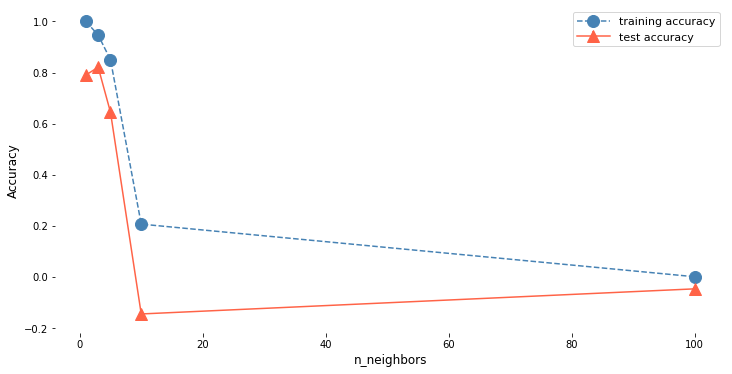

In [10]:
fig, axs = plt.subplots(figsize=(12, 6))

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

plt.errorbar(neighbors, 
             final_training_accuracy.values(),
             yerr=list(final_train_std.values()), 
             label="training accuracy", 
             color='steelblue', 
             marker='o', 
             linestyle='dashed', 
             markersize=12)

plt.errorbar(neighbors, 
             final_test_accuracy.values(),
             yerr=list(final_test_std.values()), 
             label="test accuracy", 
             color='tomato', 
             marker='^', 
             linestyle='-', 
             markersize=12)

plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("n_neighbors",fontsize=12)

plt.legend()
plt.show()

In [11]:
final_train_std

{1: 0.0,
 3: 9.337213039834899e-05,
 5: 0.00027933877377290313,
 10: 0.0007782076064353459,
 100: 1.0468970934844101e-05}

In [12]:
final_test_std

{1: 0.0021943224295932124,
 3: 0.008608557332413546,
 5: 0.010654118860770516,
 10: 0.015721262326278084,
 100: 0.005044165317893229}

<div style="text-align: justify" ><i>From the chart above, we can see that the training accuracies of each <code>n_neighbor</code> is always greater than test accuracy, and as the <code>n_neighbor</code> increases, both train and test accuracy decreases. Moreover, the purpose of error bars is to display the standard deviation of each <code>n_neighbor</code> in both train and test, however, the standard deviation of both train and test are too small to see, but we can see from the above data that, <code>k=1</code> in training has a zero (0) standard deviation since it has a train accuracy of 1.0. <b>Additionally, the train std of <code>k=3</code> is the second lowest, which means that the model gave consistent accuracies in each trial in training.</b></i></div>
<br>
<div style="text-align: justify" ><i><b>In conclusion, the optimal n_neighbors for this dataset is <code>k=3</code>, since it gave consistent results upon training and it's the second lowest in terms of disparity between train and test accuracy, and gave the highest test accuracy in both tests (the first test and the 150 trials).</b></i></div>